Shades2 data
Number of samples: 30
Grid size: 224
Side length: 8
Shade contrast: 0.15
separate: 0
Save: False 
Images: /mn/kadingir/vegardantun_000000/nobackup/NN_security_data/data/shades_vis_images  
Labels:  
Difference:  
Model : 3



TRAIN
loss: binary_crossentropy
optimizer: adam
batch size: 500
shuffle data between epochs: False
max epoch: 250
stopping_criteria: epoch
(30, 224, 224)
(30, 1)


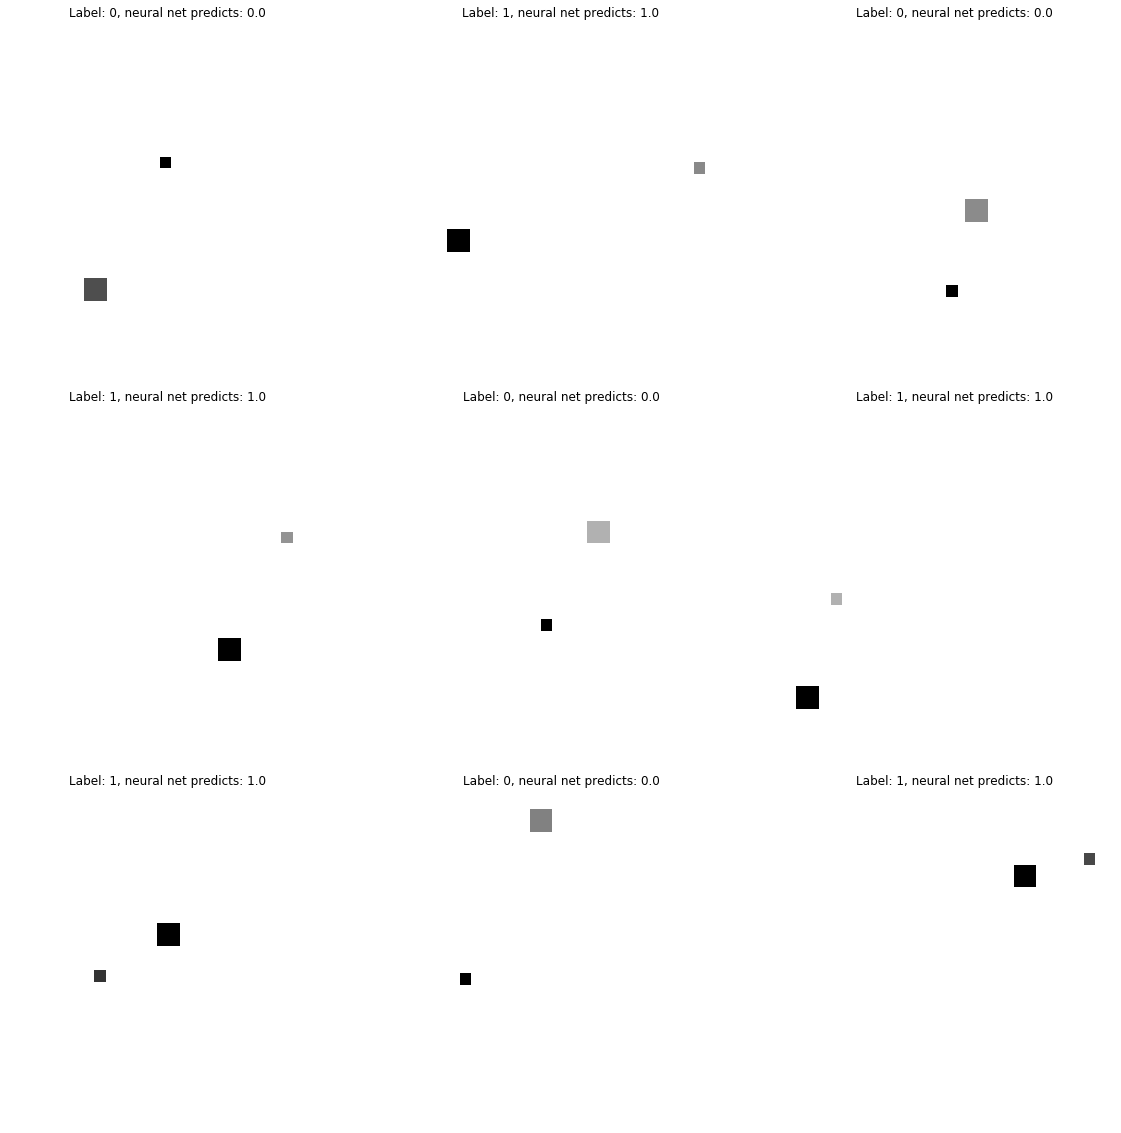

In [9]:
import yaml
import os
from os.path import join
import matplotlib.pyplot as plt;
import numpy as np;
from data_bank import data_selector
from tensorflow.keras import backend as K
import model_builders as mb
import tensorflow as tf

import os
from os.path import join


plt.rcParams["figure.figsize"]= (20,20)

grid_x = 3
grid_y = 3 
shuffle = False
data_size = grid_x*grid_y
data_generate_size = 60;

if not shuffle:
    perm_order = np.arange(data_size);
else:
    perm_order = np.random.permutation(data_size);
    
os.environ['CUDA_VISIBLE_DEVICES']="-1"

configfile = 'config_visualise.yml'
with open(configfile) as ymlfile:
    cgf = yaml.load(ymlfile, Loader=yaml.SafeLoader);

configfile1 = 'config.yml'
with open(configfile1) as ymlfile:
    cgf1 =  yaml.load(ymlfile, Loader=yaml.SafeLoader)

model_id = cgf['data_arguments']['model']
model_dest = cgf['data_arguments']['model_dest']
model_path = join(model_dest, str(model_id))

data_name = cgf['data_name'];
data_arguments = cgf['data_arguments'];

data_loader = data_selector(data_name, data_arguments)
print(data_loader)
data_images, data_labels, data_diff = data_loader.load_data();


    
model_name = cgf1['MODEL']['name']
model_arguments = cgf1['MODEL']['arguments']

input_shape = data_images.shape[1:]
output_shape = data_labels.shape[1];

# Set the default precision 
model_precision = cgf1['MODEL_METADATA']['precision']
K.set_floatx(model_precision)

model = mb.model_selector(model_name, input_shape, output_shape, model_arguments)

keras_weights_path = join(model_path, "keras_model_files.h5")
model.load_weights(keras_weights_path)

# Extract training information
loss_type = cgf1['TRAIN']['loss']['type']
optimizer = cgf1['TRAIN']['optim']['type']
batch_size = cgf1['TRAIN']['batch_size']
metric_list = list(cgf1['TRAIN']['metrics'].values()) 
shuffle_data = cgf1['TRAIN']['shuffle'] 
max_epoch = cgf1['TRAIN']['max_epoch']
stpc_type = cgf1['TRAIN']['stopping_criteria']['type']
print("""\nTRAIN
loss: {}
optimizer: {}
batch size: {}
shuffle data between epochs: {}
max epoch: {}
stopping_criteria: {}""".format(loss_type, optimizer, batch_size, shuffle_data, 
           max_epoch, stpc_type))

optimizer = cgf1['TRAIN']['optim']['type']
loss_type = cgf1['TRAIN']['loss']['type']
metric_list = list(cgf1['TRAIN']['metrics'].values())

model.compile(optimizer=optimizer,
                  loss=loss_type,
                  metrics = metric_list)


    

results = model.predict(data_images) # Values between 0 and 1.
 
data_images = np.squeeze(data_images);
results = np.squeeze(results)
print(data_images.shape)
print(data_labels.shape)
plt.figure(); 
for i in range(data_size):
    idx = perm_order[i];
    
    plt.subplot(grid_y, grid_x, i+1);
    plt.matshow(data_images[idx], cmap='gray', fignum=False);
    plt.axis('off')
    plt.title('Label: {}, neural net predicts: {}'.format(int(data_labels[idx]),round(results[idx])));

plt.show();



